# Ecuaciones diferenciales

### Método de Euler

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Condiciones iniciales
y0 = [1.0,0.0]
#Intervalo de soluciòn
t_ini = 0.0
t_end = 2*np.pi
N = 100    #Numero de intervalos
h = (t_end-t_ini)/N

In [5]:
#Vector de fuerza
def f(theta,Omega):
    return [Omega, -1*np.sin(theta)]

def Euler(func,y0,t):    #Entradas: función, condiciones iniciales, arreglo de instantes
    
    sol = np.zeros((len(t),2))
    
    sol[0][0] = y0[0]
    sol[0][1] = y0[1]
    
    for i in range(1,len(t)):
        theta_prev = sol[i-1][0]
        Omega_prev = sol[i-1][1]
        theta = theta_prev + h*func(theta_prev,Omega_prev)[0]
        Omega = Omega_prev + h*func(theta_prev,Omega_prev)[1]
        sol[i][0] = theta
        sol[i][1] = Omega
        
        
    return sol

In [6]:
# Puntos de solución
t_array = []
for i in np.arange(0,t_end,h):
    t_array.append(i)

In [7]:
print(Euler(f,y0,t_array))
sol = Euler(f,y0,t_array)

[[ 1.          0.        ]
 [ 1.         -0.05287118]
 [ 0.99667801 -0.10574236]
 [ 0.99003402 -0.15850048]
 [ 0.98007514 -0.21103071]
 [ 0.96681569 -0.26321503]
 [ 0.9502774  -0.31493076]
 [ 0.93048972 -0.3660493 ]
 [ 0.90749016 -0.41643496]
 [ 0.88132478 -0.465944  ]
 [ 0.85204866 -0.51442394]
 [ 0.81972645 -0.56171314]
 [ 0.78443297 -0.60764066]
 [ 0.74625378 -0.65202658]
 [ 0.70528574 -0.69468268]
 [ 0.66163754 -0.73541352]
 [ 0.61543015 -0.77401802]
 [ 0.56679716 -0.81029146]
 [ 0.51588505 -0.84402795]
 [ 0.46285321 -0.87502321]
 [ 0.40787388 -0.90307782]
 [ 0.35113182 -0.9280006 ]
 [ 0.29282383 -0.9496123 ]
 [ 0.23315793 -0.96774915]
 [ 0.17235245 -0.98226652]
 [ 0.11063483 -0.99304221]
 [ 0.04824015 -0.99997943]
 [-0.01459042 -1.00300927]
 [-0.07761135 -1.00209256]
 [-0.14057468 -0.99722099]
 [-0.20323192 -0.98841749]
 [-0.26533602 -0.97573577]
 [-0.32664331 -0.95925915]
 [-0.38691534 -0.93909857]
 [-0.44592065 -0.91539   ]
 [-0.5034363  -0.88829133]
 [-0.55924929 -0.85797884]
 

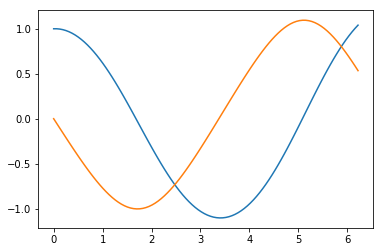

In [8]:
fig = plt.figure()
ax = plt.axes()
ax.plot(t_array,sol[:,0])
ax.plot(t_array,sol[:,1])
plt.show()


### Runge-Kutta. O(4)

In [9]:
#cond iniciales
y0 = 0.0
#intervalo de sol
t_ini = 0.0
t_end = 2.0

#puntos en donde estarà la soluciòn
N = 1000
h = (t_end-t_ini)/N

def f(t,y):
    return y-t**2+1.0

In [10]:
#vector de tiempo
t_array = []
for i in range(0,N+1):
    ti = t_ini + h*i
    t_array.append(ti)
#print(t_array)

In [11]:
def RungeKutta4(f,t,y):
  
    k1 = f(t,y)
    k2 = f(t+0.5*h,y+0.5*h*k1)
    k3 = f(t+0.5*h,y+0.5*h*k2)
    k4 = f(t+h,y+h*k3)
    
    value = y + h/6*(k1+2*k2+2*k3+k4)
    
    return value

In [12]:
sol = np.zeros((N+1,2))
sol[0][0] = t_array[0]
sol[0][1] = y0

for i in range(1,N+1):
    sol[i][0] = t_array[i]
    sol[i][1] = RungeKutta4(f,sol[i-1][0],sol[i-1][1])
    
print(sol)

[[0.         0.        ]
 [0.002      0.002002  ]
 [0.004      0.00400799]
 ...
 [1.996      1.61645709]
 [1.998      1.61371125]
 [2.         1.6109439 ]]


In [13]:
def solexact(x):
    return (np.e**x)*(x**2*np.e**(-x)+2*x*np.e**(-x)+np.e**(-x)-1)

In [14]:
solex = []
for i in range(len(t_array)):
    solex.append(solexact(t_array[i]))
#print(solex)

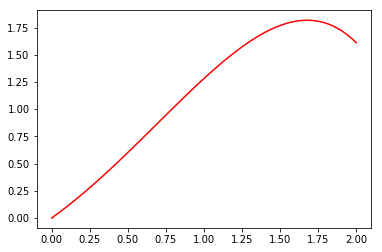

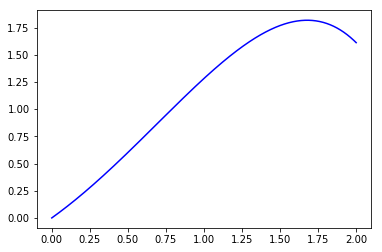

In [15]:
plt.plot(t_array,sol[0:,1],color = 'red')
plt.show()
plt.plot(t_array,solex,color = 'blue')
plt.show()

### Ejemplo

Solve for $$\frac{d²x}{dt²} + \beta\frac{dx}{dt} +\omega x= 0$$ This turms into $$\frac{dx}{dt} =v$$   $$\frac{dv}{dt} = \omega x -\beta v $$ 

In [16]:
# Dependencia en y solamente

def RungeKutta4(f,t,y):
  
    k1 = f(y)
    k2 = f(y+0.5*h*k1)
    k3 = f(y+0.5*h*k2)
    k4 = f(y+h*k3)
    
    value = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    return np.array(value)

In [17]:
#Initial conditions
y0 = np.array([3.0,0.0])

#Parameters
w = 1.5
beta = 0.2

#force function
def f(y):
    return np.array([y[1],-w*y[0]-beta*y[1]])

In [79]:
#solution interval
t0 = 0.0
tf = 20.0

N = 1000

h = (tf-t0)/N
sol = np.zeros((N,3))

sol[0][0] = t0
sol[0][1:] = y0

print(sol)

[[0. 2. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


[[ 0.          2.          0.        ]
 [ 0.02        1.99940083 -0.05987417]
 [ 0.04        1.99760687 -0.11947347]
 ...
 [19.94        0.17520961  0.23836942]
 [19.96        0.17991451  0.23210126]
 [19.98        0.1844929   0.22571915]]


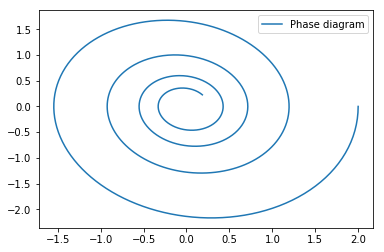

In [80]:
t_array = np.arange(0,20,h)
#print(t_array)

for i in range(1,N):
    sol[i][0] = t_array[i]
    sol[i][1:] = RungeKutta4(f,sol[i-1][0],sol[i-1][1:])
print(sol)

plt.plot(sol[0:,1],sol[0:,2],label = 'Phase diagram')
plt.legend()
plt.show()

### Leapfrog $$\frac{d²x}{dt²} = F(x)$$ se convierte en $$\frac{dv}{dt}= F(x)$$ $$\frac{dx}{dt}=v$$ 

In [107]:
# Función 
def F(x):
    return x

In [112]:
# Condiciones inicianesl [xo,vo]
y0 = np.array([0.0,2.0])

#solution interval
t0 = 0.0
tf = 5.0

N = 1000

h = (tf-t0)/N

t_array = np.arange(t0,tf+h,h)

In [113]:
def Leapfrog(y0,t_array,F):
    
    sol = np.zeros((len(t_array),3))
    
    sol[:,0] = t_array
    sol[0][1] = y0[0]
    sol[0][2] = y0[1]
    
    #return sol 

    for i in range(1,sol.shape[0]):
        
        v_inter = sol[i-1][2] + 0.5*h*F(sol[i-1][1])
        
        x_next = sol[i-1][1] + h*v_inter
        
        v_next = v_inter + 0.5*h*F(sol[i][1])
        
        
        sol[i][1] = x_next
        sol[i][2] = v_next
        
    return np.array(sol)

sol = Leapfrog(y0,t_array,F)
print(sol)

[[0.00000000e+00 0.00000000e+00 2.00000000e+00]
 [5.00000000e-03 1.00000000e-02 2.00000000e+00]
 [1.00000000e-02 2.00001250e-02 2.00002500e+00]
 ...
 [4.99000000e+00 4.81427825e+01 3.40406628e+01]
 [4.99500000e+00 4.83135876e+01 3.41610198e+01]
 [5.00000000e+00 4.84849966e+01 3.42818037e+01]]


In [116]:
def solexact(x):
    return (np.e**x-np.e**-x)

solex = []
for i in range(sol.shape[0]):
    solex.append(solexact(sol[i][0]))
#print(solex)

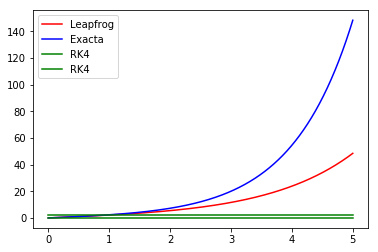

In [115]:
plt.plot(sol[0:,0],sol[0:,1],color = 'red',label = 'Leapfrog')
#plt.show()
plt.plot(sol[0:,0],solex,color = 'blue',label= 'Exacta')
plt.legend()
plt.show()

# Números aleatorios

In [104]:
#Número
np.random.rand()
#Lista
np.random.rand(10)
#Matriz
a = np.random.rand(1000,2)
print(a)

[[0.1171175  0.8210427 ]
 [0.10600834 0.77907141]
 [0.47713518 0.20645541]
 ...
 [0.66966908 0.73031937]
 [0.01959912 0.97386228]
 [0.91113366 0.75631951]]


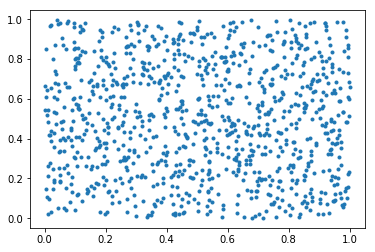

In [106]:
#Análisis de dispersión de números aleatorios#Análisi 
ax = plt.figure()
ax = plt.axes()
ax.plot(a[0:,0],a[0:,1],'.')

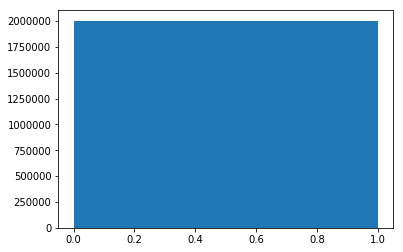

In [107]:
a= np.random.rand(100000000)
plt.hist(a,bins=50)
plt.show()

Se observa que la frecuencia de aparición de los números entre 0 y 1 es prácticamente la misma



In [125]:
#Se pueden generar números con distribuciones normales
x = []
y = []

for i in range(0,1000):
    if (i%2 == 0):
        x.append(np.random.normal(4))
    else:
        y.append(np.random.normal(4))

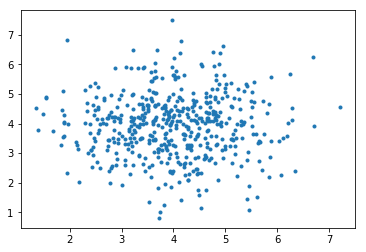

In [126]:
#Análisis de dispersión de números aleatorios#Análisi 
ax = plt.figure()
ax = plt.axes()
ax.plot(x,y,'.')
#Aplicaciones a Galaxias

In [129]:
t = np.random.normal(4,size = (100000))

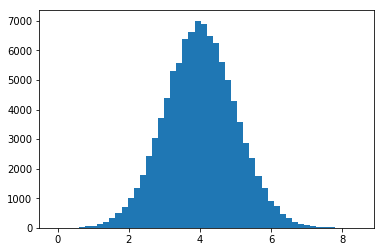

In [130]:
plt.hist(t,bins=50)
plt.show()

In [128]:
#Monte Carlo Reasoning
datos = np.random.rand(1000,2)

(0, 1)

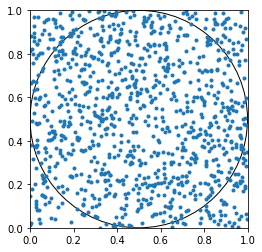

In [135]:
#Análisis de dispersión de números aleatorios
ax = plt.figure()
ax = plt.axes()
ax.plot(datos[0:,0],datos[0:,1],'.')
circle = plt.Circle((0.5,0.5),0.5,fill = False)
ax.add_artist(circle)
ax.set_aspect('equal')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

In [136]:
N_in=0
N_out=0
for i in range(0,datos.shape[0]):
    dist=((datos[i][0]-0.5)**2+(datos[i][1]-0.5)**2)**0.5
    if (dist<=0.5):
        N_in+=1
    else:
        N_out+=1
    
print("pi=%.15f"%((4*N_in)/(N_in+N_out)))
    

pi=3.172000000000000


## Integración de Monte Carlo

In [137]:
#Dimensión
M = 10
#Puntos aleatorios
a = np.random.rand(1000000,M)          #Ojo!!!!!, estos valores deben estar entre los límites!!!!!!
print(a)
#Límites de integración
limites = np.array([[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]])

[[0.82279998 0.25299472 0.07639695 ... 0.20904146 0.24525787 0.59128819]
 [0.47095333 0.02853417 0.99864357 ... 0.10363291 0.38949069 0.30449618]
 [0.64451954 0.14175298 0.59538176 ... 0.03336951 0.60040656 0.12643668]
 ...
 [0.86551186 0.44905284 0.94811137 ... 0.02009773 0.5856389  0.16813136]
 [0.74365469 0.59201975 0.32060147 ... 0.06938435 0.32214958 0.66194922]
 [0.06760434 0.14386963 0.89752232 ... 0.69584816 0.67876974 0.95047873]]


$$\int_{x_1}^{x_2}...\int_{x_n-1}^{x_n} f(x_1,...x_n )\quad dx_1...dx_n \quad \approx \quad<f(x_1...x_n)>*\Omega$$

where $$<f(x_1...x_n)> \approx \frac{f(a_1...a_n)}{M}$$ $$$$where the a's are random numbers evaluated M times and $\Omega$ is the volume of the box

In [143]:
#Función a integrar
def f(r):
    sum = 0.0
    for i in range(len(r)):
        sum += r[i] 
    return (sum)**2

In [144]:
#Método de Monte Carlo
def Montecarlo(f,a,limites):
    prod = 1.0
    for i in range(0,limites.shape[0]):
        prod = prod*(limites[i][1]-limites[i][0])
    
    sum = 0.0
    for i in range(0,a.shape[0]):
        sum = sum + f(a[i])*prod
    
    return sum/a.shape[0]

In [145]:
#Solución exacta
print(155/6)

25.833333333333332


In [160]:
print(Montecarlo(f,a,limites))

1.7169040689077824


### Example: Approximate e

Using $$\int_{0}^{1}e^x dx = e -1$$

In [165]:
def f(x):
    return np.e**x
limites = np.array([[0,1]])

a = np.random.rand(1000)
#print(a)

In [168]:
print('e = %f'%(Montecarlo(f,a,limites)+1))

e = 2.736334
